# Principal Component Analysis algorithm

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pca_utils import plot_widget
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import plotly.offline as py

In [2]:
py.init_notebook_mode()

In [3]:
output_notebook()

Loading BokehJS ...

## Example 1

In [4]:
X = np.array([[ 99,  -1],
  [ 98,  -1],
  [ 97,  -2],
  [101,   1],
  [102,   1],
  [103,   2]], dtype=np.float64)

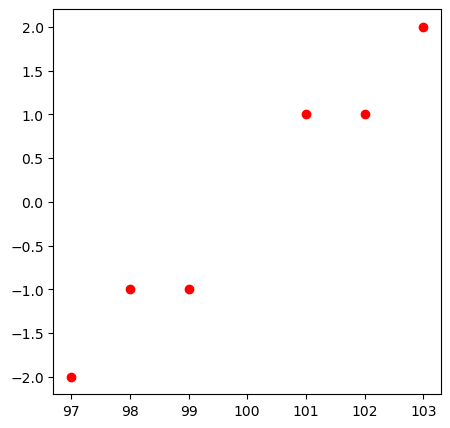

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5));
ax.plot(X[:, 0], X[:, 1], 'ro');

In [6]:
pca_2d = PCA(n_components=2)
pca_2d.fit(X);

In [7]:
print(f'PCA 2D first principal component explained variance ratio: {pca_2d.explained_variance_ratio_[0]}')
print(f'PCA 2D second principal component explained variance ratio: {pca_2d.explained_variance_ratio_[1]}')

assert pca_2d.explained_variance_ratio_[0] + pca_2d.explained_variance_ratio_[1] == np.float64(1.0), "Impossible!"

PCA 2D first principal component explained variance ratio: 0.9924428900898052
PCA 2D second principal component explained variance ratio: 0.007557109910194766


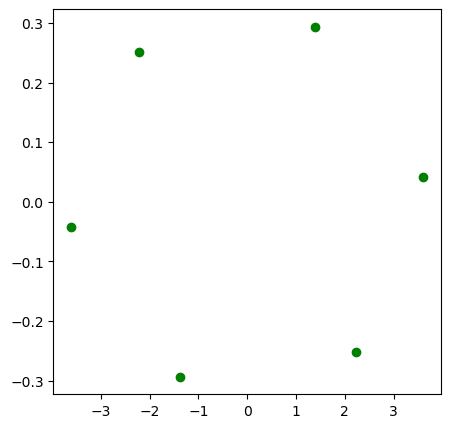

In [8]:
X_transformed_2d = pca_2d.transform(X)

fig, ax = plt.subplots(1, 1, figsize=(5, 5));
ax.plot(X_transformed_2d[:, 0], X_transformed_2d[:, 1], 'go');

[99. -1.] <==> [99. -1.]; Information loss: [0.00000000e+00 5.44009282e-15]
[98. -1.] <==> [98. -1.]; Information loss: [0.00000000e+00 6.99440506e-15]
[97. -2.] <==> [97. -2.]; Information loss: [0.0000000e+00 4.4408921e-15]
[101.   1.] <==> [101.   1.]; Information loss: [0.00000000e+00 5.44009282e-15]
[102.   1.] <==> [102.   1.]; Information loss: [1.42108547e-14 9.99200722e-16]
[103.   2.] <==> [103.   2.]; Information loss: [0.00000000e+00 1.33226763e-15]


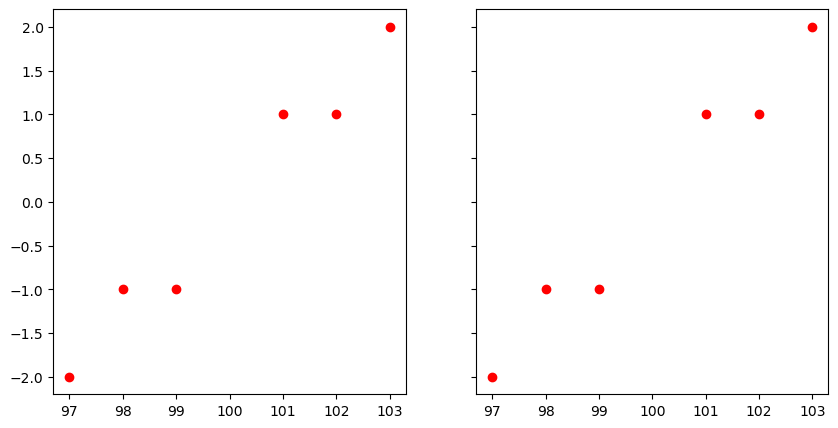

In [14]:

X_reconstructed_2d = pca_2d.inverse_transform(X_transformed_2d)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax[0].plot(X[:, 0], X[:, 1], 'ro');
ax[1].plot(X_reconstructed_2d[:, 0], X_reconstructed_2d[:, 1], 'ro');
for i in range(len(X)):
  # print(f'{X[i]} <==> {X_reconstructed_2d[i]}')
  print(f'{X[i]} <==> {X_reconstructed_2d[i]}; Information loss: {np.abs(X[i] - X_reconstructed_2d[i])}')

In [10]:
pca_1d = PCA(n_components=1)
pca_1d.fit(X)

print(f'PCA 1D first principal component explained variance ratio: {pca_1d.explained_variance_ratio_[0]}')
assert pca_1d.explained_variance_ratio_[0] < 1, "Impossible!"

PCA 1D first principal component explained variance ratio: 0.9924428900898052


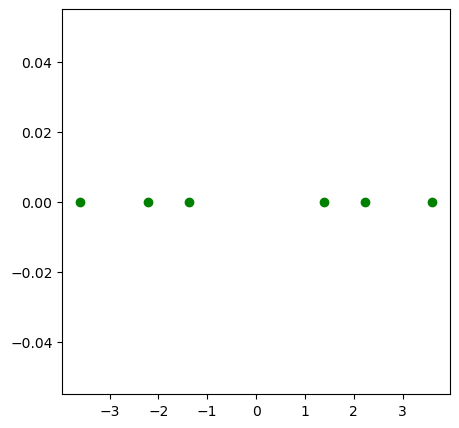

In [11]:

X_transformed_1d = pca_1d.transform(X)

fig, ax = plt.subplots(1, 1, figsize=(5, 5));
ax.plot(X_transformed_1d[:, 0], np.zeros(len(X_transformed_1d)), 'go');

[99. -1.] <==> [98.84002499 -0.75383654]; Information loss: [0.15997501 0.24616346]
[98. -1.] <==> [98.13695576 -1.21074232]; Information loss: [0.13695576 0.21074232]
[97. -2.] <==> [96.97698075 -1.96457886]; Information loss: [0.02301925 0.03542114]
[101.   1.] <==> [101.15997501   0.75383654]; Information loss: [0.15997501 0.24616346]
[102.   1.] <==> [101.86304424   1.21074232]; Information loss: [0.13695576 0.21074232]
[103.   2.] <==> [103.02301925   1.96457886]; Information loss: [0.02301925 0.03542114]


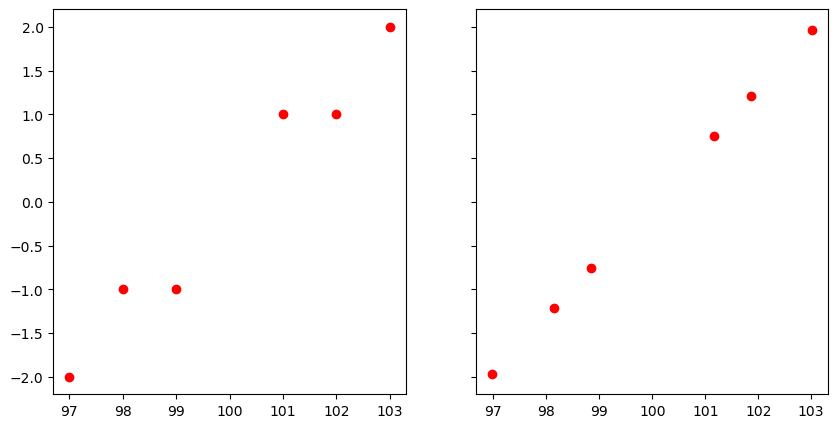

In [13]:
X_reconstructed_1d = pca_1d.inverse_transform(X_transformed_1d)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True);
ax[0].plot(X[:, 0], X[:, 1], 'ro');
ax[1].plot(X_reconstructed_1d[:, 0], X_reconstructed_1d[:, 1], 'ro');
for i in range(len(X)):
  print(f'{X[i]} <==> {X_reconstructed_1d[i]}; Information loss: {np.abs(X[i] - X_reconstructed_1d[i])}')

# Visualizing PCA

In [ ]:
X = np.array([[-0.83934975, -0.21160323],
  [ 0.67508491,  0.25113527],
  [-0.05495253,  0.36339613],
  [-0.57524042,  0.24450324],
  [ 0.58468572,  0.95337657],
  [ 0.5663363 ,  0.07555096],
  [-0.50228538, -0.65749982],
  [-0.14075593,  0.02713815],
  [ 0.2587186 , -0.26890678],
  [ 0.02775847, -0.77709049]])

In [19]:
p = figure(
  title='10-point scatterplot',
  x_axis_label='x-axis',
  y_axis_label='y-axis'
)

p.scatter(
  X[:, 0],
  X[:, 1],
  marker='o',
  color='#C00000',
  size=5
)

p.grid.visible = False
p.grid.visible = False
p.outline_line_color = None 
p.toolbar.logo = None
p.toolbar_location = None
p.xaxis.axis_line_color = "#f0f0f0"
p.xaxis.axis_line_width = 5
p.yaxis.axis_line_color = "#f0f0f0"
p.yaxis.axis_line_width = 5

show(p)

In [20]:
plot_widget()

    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              …

In [21]:

from pca_utils import random_point_circle, plot_3d_2d_graphs
X = random_point_circle(n = 150)
deb = plot_3d_2d_graphs(X)
deb.update_layout(yaxis2 = dict(title_text = 'test', visible=True))


## Exploratory Data Analysis

In [25]:
# Generate some data
df = pd.read_csv("toy_dataset.csv")


In [26]:
# Generate some data
def get_pairs(n = 100):
    from random import randint
    i = 0
    tuples = []
    while i < 100:
        x = df.columns[randint(0,999)]
        y = df.columns[randint(0,999)]
        while x == y or (x,y) in tuples or (y,x) in tuples:
            y = df.columns[randint(0,999)]
        tuples.append((x,y))
        i+=1
    return tuples

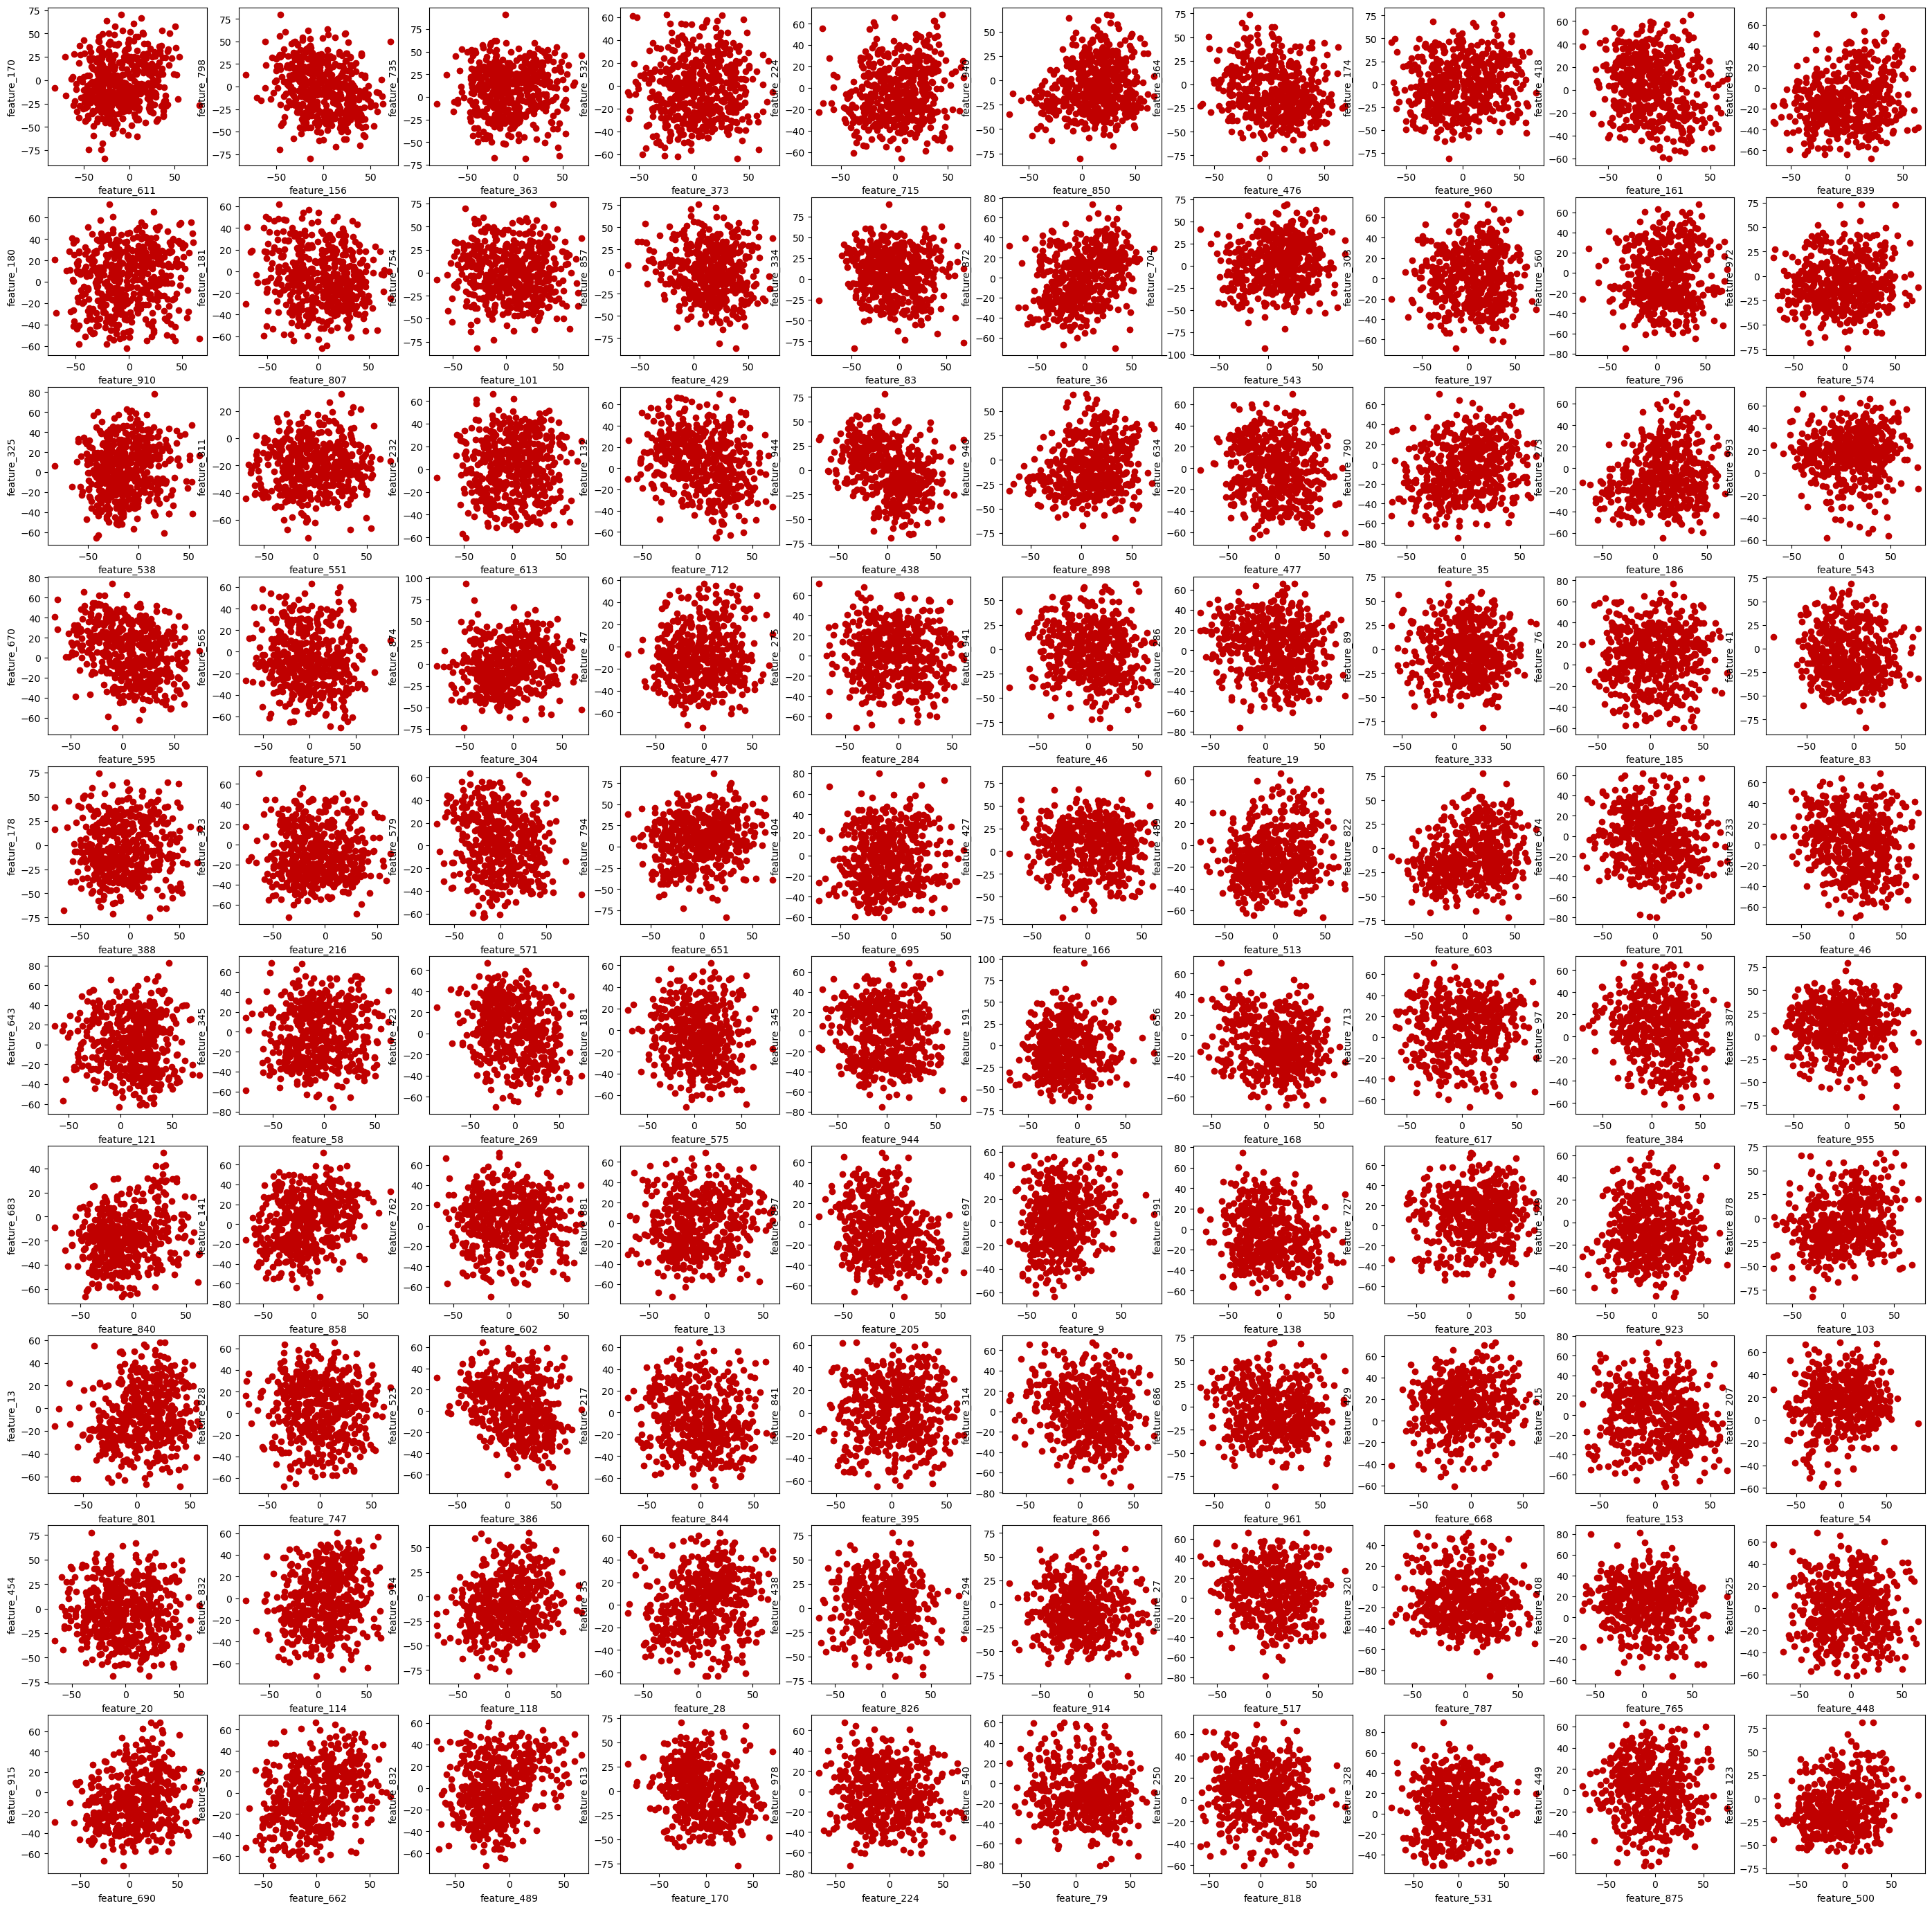

In [27]:
# Generate some data
pairs = get_pairs()

fig, axs = plt.subplots(10,10, figsize = (35,35))
i = 0
for rows in axs:
    for ax in rows:
        ax.scatter(df[pairs[i][0]],df[pairs[i][1]], color = "#C00000")
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i+=1

In [28]:
correlations = df.corr()

In [30]:
mask = (abs(correlations) > 0.5) & (abs(correlations) != 1)
correlations.where(mask).stack().sort_values()

feature_657  feature_81    -0.631294
feature_81   feature_657   -0.631294
feature_313  feature_4     -0.615317
feature_4    feature_313   -0.615317
feature_716  feature_1     -0.609056
                              ...   
feature_792  feature_547    0.620864
feature_35   feature_965    0.631424
feature_965  feature_35     0.631424
feature_985  feature_395    0.632593
feature_395  feature_985    0.632593
Length: 1870, dtype: float64

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
pca_df = pd.DataFrame(X_pca, columns=['principal_component_1', 'principal_component_2'])
pca_df.head()

principal_component_1  principal_component_2
0              46.235641              -1.672797
1             210.208758             -84.068249
2              26.352795            -127.895751
3             116.106804            -269.368256
4             110.183605            -279.657306

Text(0.5, 1.0, 'PCA decomposition')

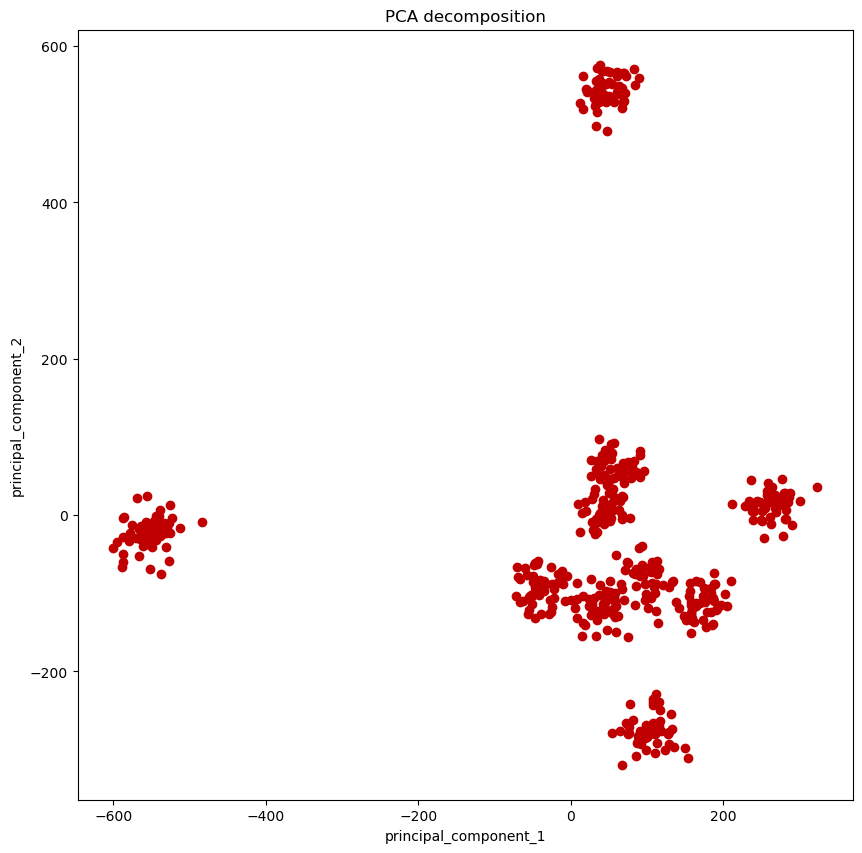

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(
  pca_df['principal_component_1'],
  pca_df['principal_component_2'],
  color='#C00000'
)
ax.set_xlabel('principal_component_1')
ax.set_ylabel('principal_component_2')
ax.set_title('PCA decomposition')

In [33]:
sum(pca.explained_variance_ratio_)

np.float64(0.14572843555106268)

In [37]:
# 3D!
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(df)
pca_df_3d = pd.DataFrame(X_pca_3d, columns=['principal_component_1', 'principal_component_2', 'principal_component_3'])
pca_df_3d.head()

principal_component_1  principal_component_2  principal_component_3
0              46.235641              -1.672797              38.410180
1             210.208758             -84.068249            -275.195623
2              26.352795            -127.895751             166.058699
3             116.106804            -269.368256            -286.123911
4             110.183605            -279.657306            -308.823198

In [38]:
sum(pca_3d.explained_variance_ratio_)

np.float64(0.2080625781609325)

In [39]:
import plotly.express as px
fig = px.scatter_3d(
  pca_df_3d,
  x = 'principal_component_1',
  y = 'principal_component_2',
  z = 'principal_component_3'
).update_traces(marker = dict(color = "#C00000"))

fig.show()